In [82]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import boston_housing
from keras import models, regularizers, optimizers, losses
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten, Input
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from keras import backend as K
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [83]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data(test_split=0.1)

mean = x_train.mean()
std = x_train.std()

x_train -= mean
x_train /= std

x_test -= mean
x_test /= std

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

In [84]:
print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

print(x_test.shape)
print(y_test.shape)

(409, 13)
(409,)
(46, 13)
(46,)
(51, 13)
(51,)


In [85]:
print("X ", x_train)
print("y: ", y_train)

X  [[-0.48193617 -0.48236232 -0.45200211 ... -0.35234593  2.03919494
  -0.39473957]
 [-0.4819749  -0.48236232 -0.46534954 ... -0.35926169  2.23297469
  -0.45158716]
 [-0.48210381 -0.48236232 -0.4464695  ... -0.34266386  2.21063677
  -0.4356809 ]
 ...
 [-0.46991201 -0.48236232 -0.34695163 ... -0.38070057  1.09173507
  -0.39840493]
 [-0.43633845 -0.48236232 -0.35718697 ... -0.34266386  2.26250501
  -0.38561076]
 [-0.4528921  -0.48236232 -0.35718697 ... -0.34266386  2.21990389
  -0.39473957]]
y:  [17.2 50.  20.7 19.3 11.9 32.  22.6 13.3 21.7 20.3 18.5 22.5 19.  50.
 14.3  7.2 33.1 17.4 18.4 19.4 27.5 19.6 13.9 32.  25.  10.8 30.8 22.9
 37.3 22.  21.4 20.   7.5 20.  16.5 19.1 11.  18.5 11.5 18.2 14.  14.2
 24.2 28.5 10.2 18.1 13.2 13.6 23.1 23.  21.  14.3 21.7 34.9 12.  21.2
 15.1  8.7 17.4 21.7 20.6 24.4 24.6 23.9 18.9 15.  31.7 33.1 23.2 18.7
 10.5 15.6 17.8 14.4 19.9 15.6 23.7 22.5 50.  50.  22.8 19.3 20.8 21.7
 24.4 18.5 21.8 29.9 21.1 37.9 15.4 21.7 17.  19.9 33.2 15.3  9.5 16.1
 22.3

In [86]:
model = models.Sequential()
model.add(Input((x_train.shape[1],)))
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
epochs = 500
batch_size = 16
loss = losses.mean_squared_error
opt = optimizers.RMSprop(0.1)

model.compile(loss=loss, optimizer=opt, metrics=['mae'])

lr_reduction = ReduceLROnPlateau(
    monitor= "val_loss",
    factor=0.5,
    patience=5,
    verbose=1,
    min_lr=0.001
)

In [88]:
history = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    epochs=epochs, batch_size=batch_size,
                    verbose=1,
                    callbacks=[lr_reduction])

Epoch 1/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6822.5615 - mae: 29.9121 - val_loss: 178.8860 - val_mae: 9.0207 - learning_rate: 0.1000
Epoch 2/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 119.6822 - mae: 8.2881 - val_loss: 129.2034 - val_mae: 6.8475 - learning_rate: 0.1000
Epoch 3/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 145.4952 - mae: 9.2505 - val_loss: 162.9588 - val_mae: 8.4765 - learning_rate: 0.1000
Epoch 4/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 80.5066 - mae: 6.7082 - val_loss: 104.6063 - val_mae: 8.3660 - learning_rate: 0.1000
Epoch 5/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 94.0605 - mae: 7.2440 - val_loss: 104.8727 - val_mae: 7.0106 - learning_rate: 0.1000
Epoch 6/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 74.0856 - mae: 6.2414 - val_loss: 118.0339 - val_mae: 6.7456 - learning_rate: 0.1000
Epoch 7/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 65.0763 - mae: 5.7761 - val_loss: 109.5483 - val_mae: 6.5889 - learning_

In [89]:
score = model.evaluate(x_test, y_test, verbose=0)
y_pred = model.predict(x_test)
print('Validation loss:', score[0])
print('Validation mae:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Validation loss: 46.41645050048828
Validation mae: 4.899364948272705


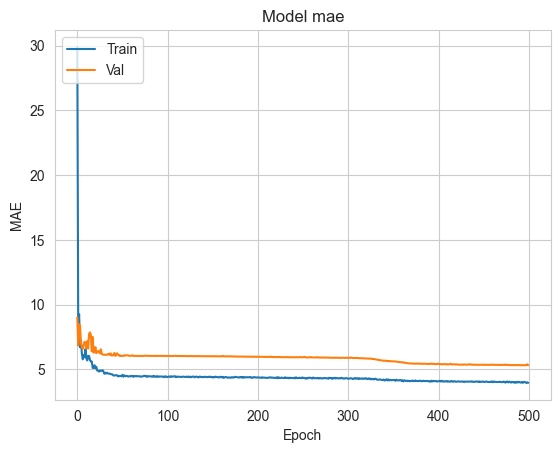

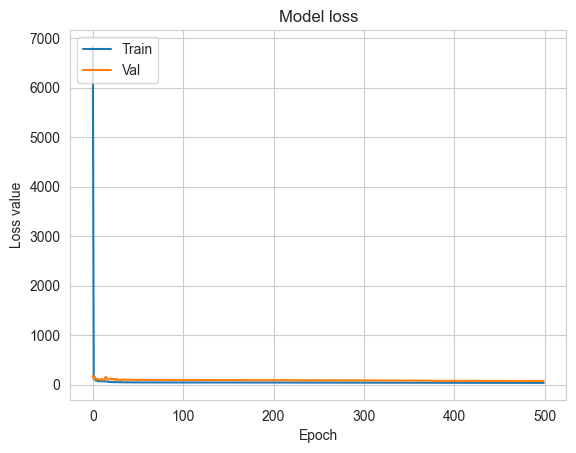

In [91]:
mae = history.history['mae']
loss = history.history['loss']

val_mae = history.history['val_mae']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(mae)
plt.plot(val_mae)
plt.title('Model mae')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.figure()
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss value')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()